In [66]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np  # Agregar esta línea para importar NumPy
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Data

In [67]:
data = pd.read_csv('dataset_tissue.txt', delimiter=',', header=0, index_col=0)

tissuesName = pd.read_csv('clase.txt', delimiter=',', header=0, index_col=0)

tissuesName = tissuesName['x']

data = data.T

In [68]:
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.921690,5.718190,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.339130,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.962430,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.415980,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.603650,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,8.205598,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.540570


# PCA - N components necesarios

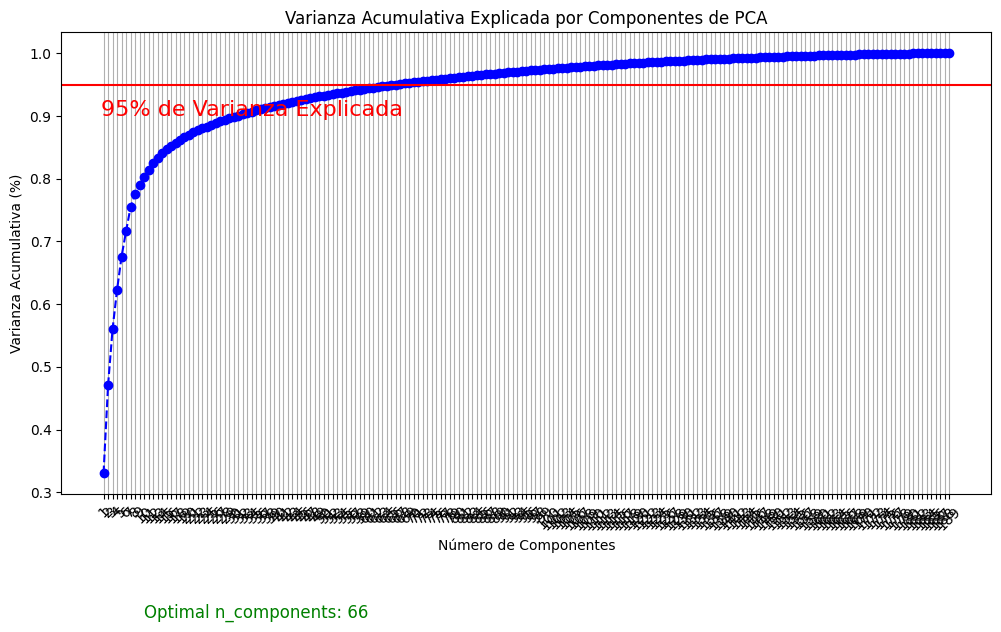

El número óptimo de componentes principales para alcanzar o superar el 95% de varianza es: 66


In [69]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Cargar tus datos desde el archivo CSV
#data = pd.read_csv('pca_results.csv')

# Aplicar PCA a los datos
pca = PCA()
pca.fit(data)

# Realizar el análisis de la varianza acumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número óptimo de componentes para alcanzar o superar el 95% de varianza
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Visualizar la varianza acumulativa
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes')
plt.xticks(np.arange(1, len(cumulative_variance) + 1), rotation=45)  # Rotar etiquetas
plt.ylabel('Varianza Acumulativa (%)')
plt.title('Varianza Acumulativa Explicada por Componentes de PCA')

# Agregar una línea de corte al 95% de varianza explicada
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% de Varianza Explicada', color='red', fontsize=16)

# Imprimir el número óptimo de componentes
plt.text(10, 0.1, f'Optimal n_components: {optimal_n_components}', fontsize=12, color='green')

plt.grid(axis='x')
plt.show()

print(f'El número óptimo de componentes principales para alcanzar o superar el 95% de varianza es: {optimal_n_components}')


# Aplica PCA con los N-Components necesarios

In [70]:


n_components = 66  # O un valor menor si deseas reducir la dimensionalidad
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data)

# Crear un DataFrame con los resultados de PCA
pca_results = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Guardar el nuevo DataFrame en un archivo CSV
pca_results.to_csv('pca_results.csv', index=False)


# Aplico DBSCAN

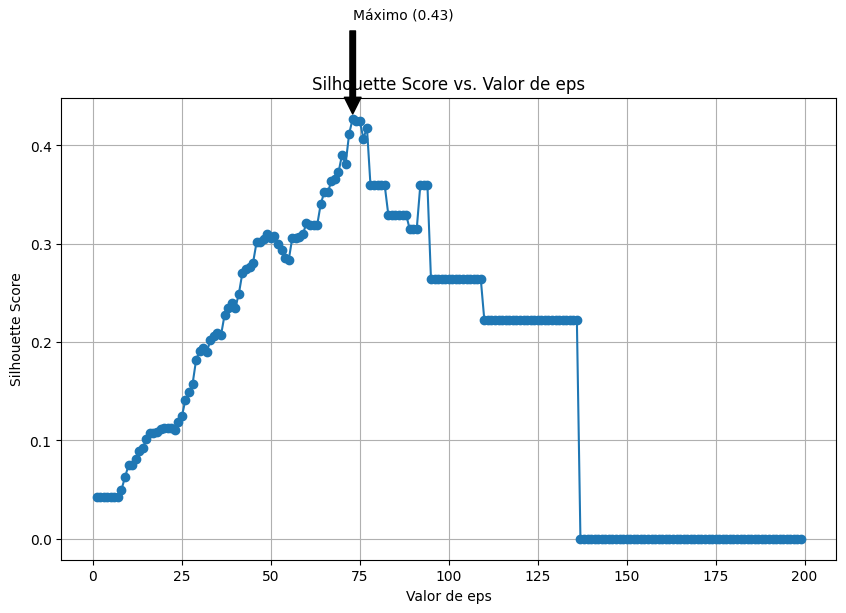

El valor máximo del Silhouette Score es 0.42720351635815673 y se obtiene con eps = 73.


In [71]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar los datos reducidos
data_reduced = pd.read_csv("pca_results.csv")

# Rango de valores de eps
eps_values = np.arange(1, 200)
silhouette_scores = []
best_eps = None
max_silhouette_score = -1

# Calcular el Silhouette Score para cada valor de eps
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=1)
    cluster_labels = dbscan.fit_predict(data_reduced)
    if len(set(cluster_labels)) > 1:  # Asegurarse de que haya al menos 2 grupos
        silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    else:
        silhouette_avg = 0
    
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        best_eps = eps

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Valor de eps')
plt.xlabel('Valor de eps')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Marcar el valor máximo
plt.annotate(f'Máximo ({max_silhouette_score:.2f})', xy=(best_eps, max_silhouette_score), xytext=(best_eps, max_silhouette_score + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05),)

plt.show()

print(f"El valor máximo del Silhouette Score es {max_silhouette_score} y se obtiene con eps = {best_eps}.")


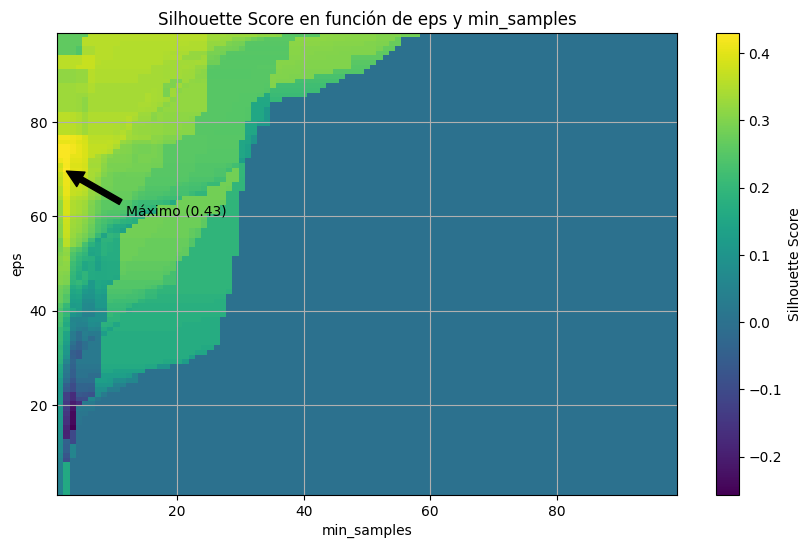

El valor máximo del Silhouette Score es 0.4305137806054641 y se obtiene con eps = 70 y min_samples = 2.


In [73]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar los datos reducidos
data_reduced = pd.read_csv("pca_results.csv")

# Rangos de valores de eps y min_samples
eps_values = np.arange(1, 100)
min_samples_values = np.arange(1, 100)

# Crear una matriz para almacenar los puntajes de silueta
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Calcular el Silhouette Score para cada combinación de eps y min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data_reduced)
        if len(set(cluster_labels)) > 1:  # Asegurarse de que haya al menos 2 grupos
            silhouette_avg = silhouette_score(data_reduced, cluster_labels)
        else:
            silhouette_avg = 0
        silhouette_scores[i][j] = silhouette_avg

# Encontrar el valor máximo del Silhouette Score y sus índices
max_silhouette_score = np.max(silhouette_scores)
best_eps_idx, best_min_samples_idx = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_values[best_eps_idx]
best_min_samples = min_samples_values[best_min_samples_idx]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, extent=[min_samples_values.min(), min_samples_values.max(), eps_values.min(), eps_values.max()],
           aspect='auto', origin='lower')
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Score en función de eps y min_samples')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.grid(True)

# Anotar el valor máximo
plt.annotate(f'Máximo ({max_silhouette_score:.2f})', xy=(best_min_samples, best_eps),
             xytext=(best_min_samples + 10, best_eps - 10), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

print(f"El valor máximo del Silhouette Score es {max_silhouette_score} y se obtiene con eps = {best_eps} y min_samples = {best_min_samples}.")


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Cargar los datos reducidos
data_reduced = pd.read_csv("pca_results.csv")

# Aplicar DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=1)  # Ajusta los hiperparámetros según tus necesidades
cluster_labels = dbscan.fit(data_reduced)
cluster_labels# Agregar etiquetas de cluster al DataFrame
data_reduced["Cluster"] = cluster_labels


# Puntuacion

In [ ]:
from sklearn.metrics import silhouette_score

# Obtener las etiquetas de cluster de DBSCAN
cluster_labels = dbscan.fit_predict(data_reduced)

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(data_reduced, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.33234278925122834


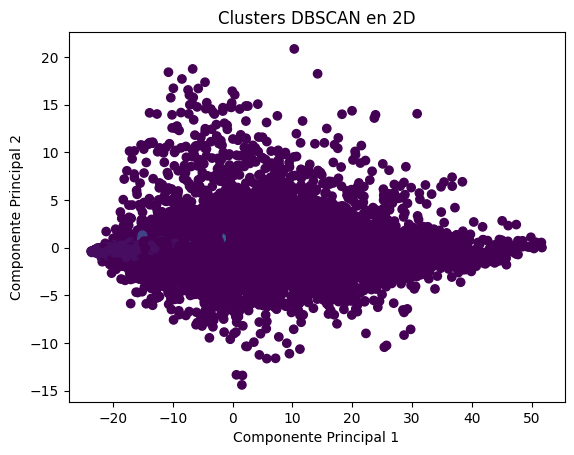

Puntuación de la silueta: -0.1945043827706053
Índice de Davies-Bouldin: 0.7026764463719387


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos de tejidos y nombres de tejidos
data = pd.read_csv('dataset_tissue.txt', delimiter=',', header=0, index_col=0)
tissuesName = pd.read_csv('clase.txt', delimiter=',', header=0, index_col=0)
tissuesName = tissuesName['x']

# Transponer los datos para que las columnas se conviertan en filas y viceversa
#data = data.T

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Realizar PCA
pca = PCA()
principal_components = pca.fit_transform(data_normalized)

# Determinar el número óptimo de componentes
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Reducir la dimensionalidad a un número óptimo de componentes
pca = PCA(n_components=optimal_n_components)
principal_components = pca.fit_transform(data_normalized)

# Guardar los resultados de PCA en un archivo CSV
pca_results = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_n_components)])
pca_results.to_csv('pca_results_normalized.csv', index=False)

# Aplicar DBSCAN a los datos reducidos
data_reduced = pd.read_csv('pca_results_normalized.csv')
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data_reduced)
data_reduced['Cluster'] = cluster_labels

# Visualización de los clusters en 2D (usando las dos primeras componentes principales)
plt.scatter(data_reduced['PC1'], data_reduced['PC3'], c=cluster_labels, cmap='viridis')
plt.title('Clusters DBSCAN en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Calcular la puntuación de la silueta
silhouette_avg = silhouette_score(data_reduced, cluster_labels)

# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_reduced, cluster_labels)

print(f"Puntuación de la silueta: {silhouette_avg}")
print(f"Índice de Davies-Bouldin: {db_score}")
